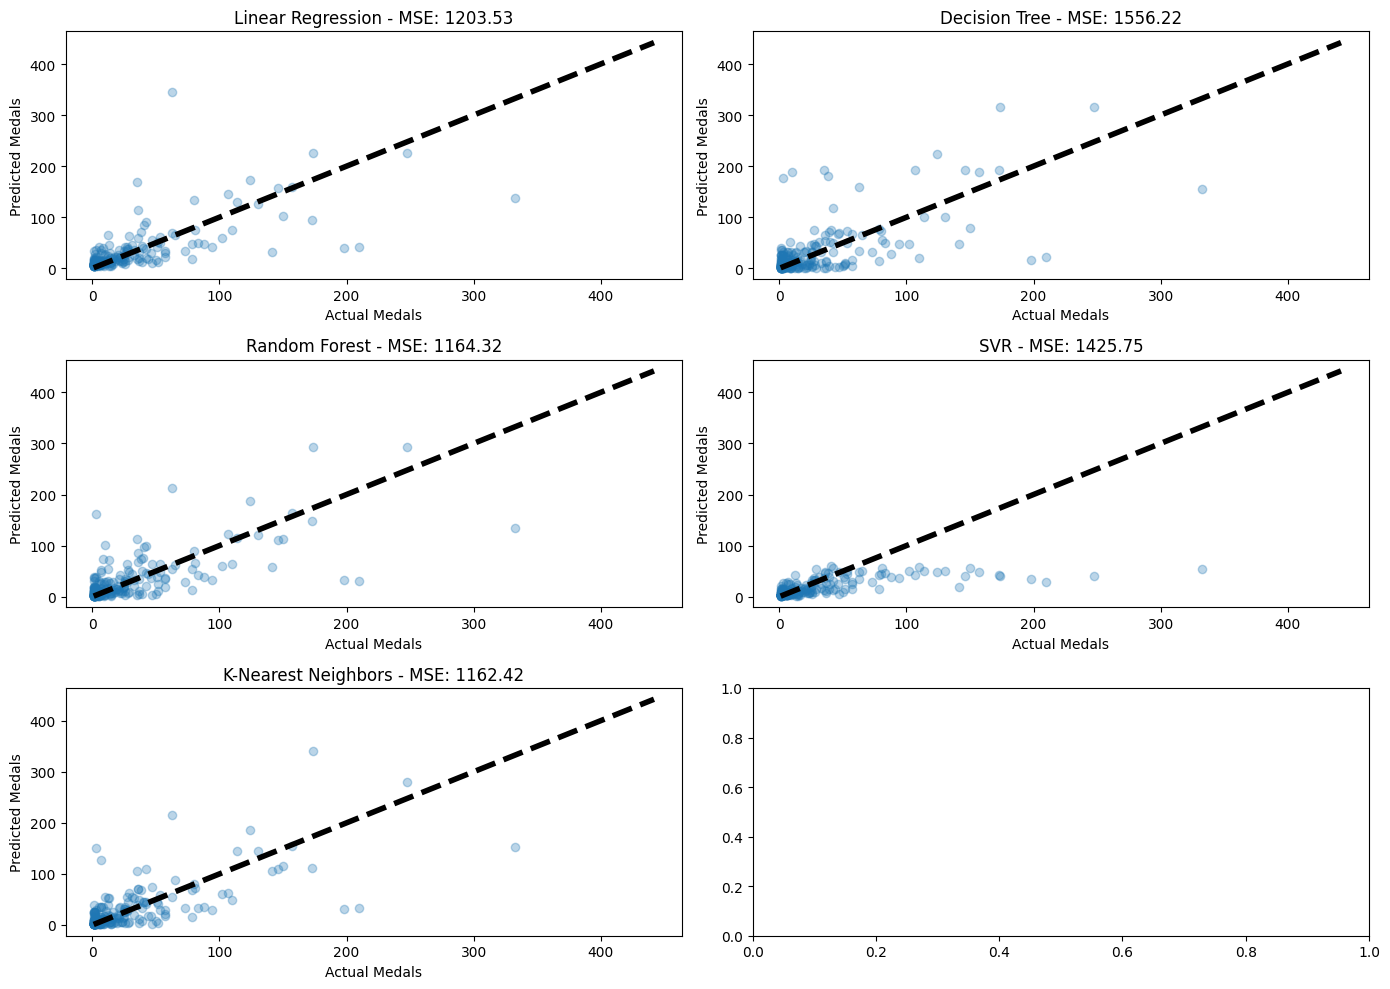

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/olympics.csv')

# Preprocessing
# Count the number of medals each country won
medal_counts = data.groupby(['Country', 'Year']).size().reset_index(name='Medals')

# Feature Engineering: Create a feature for previous medals
medal_counts['Previous_Medals'] = medal_counts.groupby('Country')['Medals'].shift().fillna(0)

# Prepare data for modeling
X = medal_counts[['Year', 'Previous_Medals']]
y = medal_counts['Medals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'SVR': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=3)
}

# Train and predict with each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    results[name] = (predictions, mse)

# Plotting results
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
for (name, (predictions, mse)), ax in zip(results.items(), axes.flatten()):
    ax.scatter(y_test, predictions, alpha=0.3)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_title(f'{name} - MSE: {mse:.2f}')
    ax.set_xlabel('Actual Medals')
    ax.set_ylabel('Predicted Medals')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming the DataFrame is named df
df = pd.read_csv('/content/olympics.csv')  # Update the path to where your dataset is located

# Display the data description in a tabular form
data_description = df.describe(include='all')
print(data_description)

                Year    City     Sport Discipline          Athlete Country  \
count   31165.000000   31165     31165      31165            31165   31161   
unique           NaN      22        43         67            22762     147   
top              NaN  London  Aquatics  Athletics  PHELPS, Michael     USA   
freq             NaN    3567      4170       3638               22    4585   
mean     1970.482785     NaN       NaN        NaN              NaN     NaN   
std        33.158416     NaN       NaN        NaN              NaN     NaN   
min      1896.000000     NaN       NaN        NaN              NaN     NaN   
25%      1948.000000     NaN       NaN        NaN              NaN     NaN   
50%      1980.000000     NaN       NaN        NaN              NaN     NaN   
75%      2000.000000     NaN       NaN        NaN              NaN     NaN   
max      2012.000000     NaN       NaN        NaN              NaN     NaN   

       Gender     Event  Medal  
count   31165     31165  31165

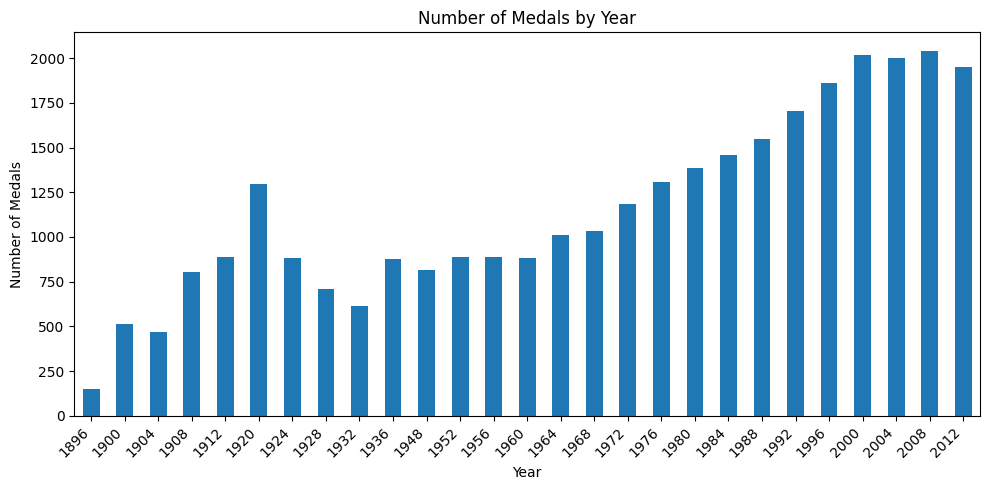

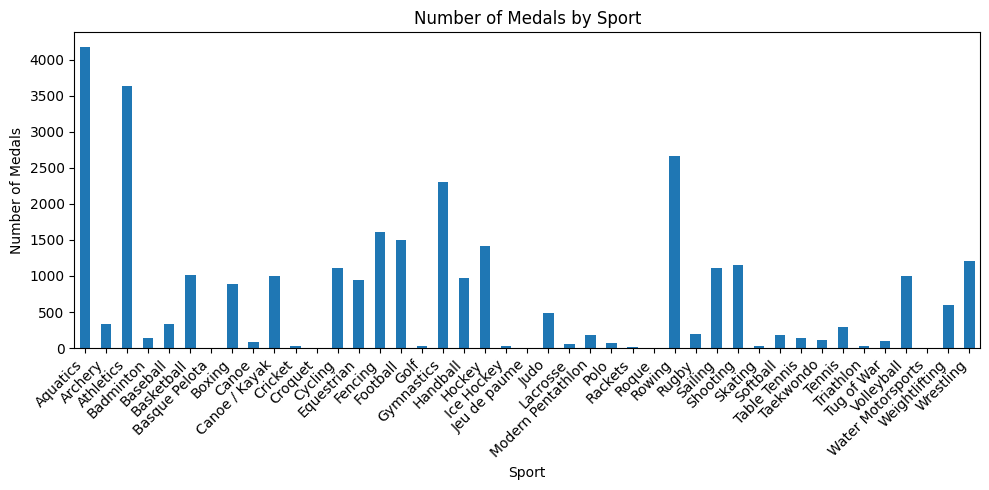

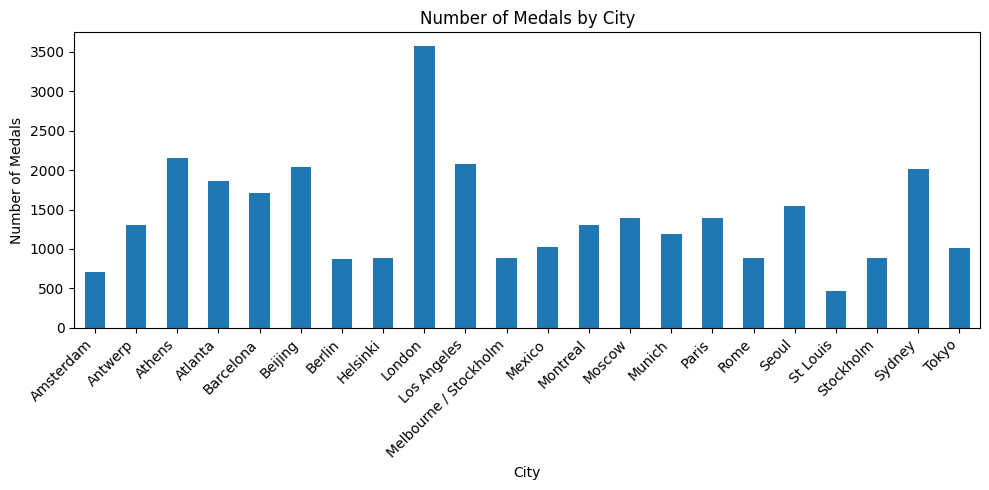

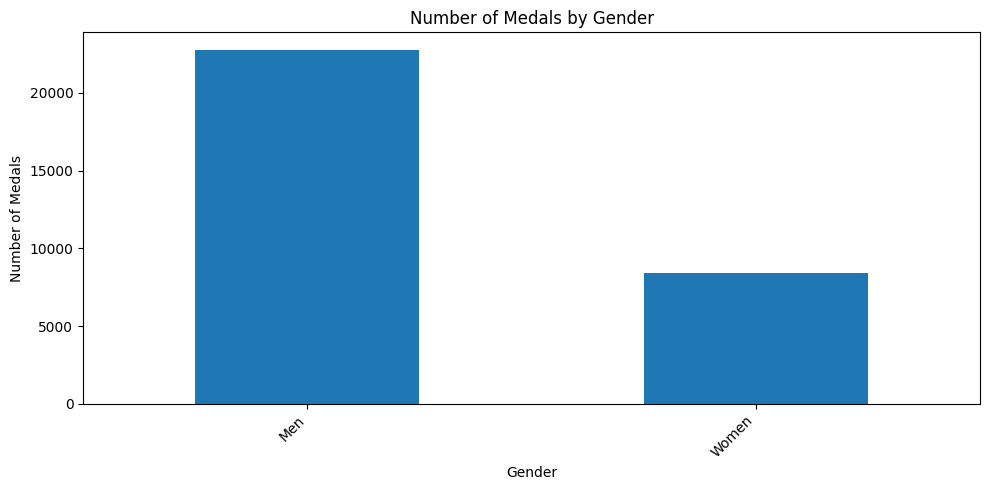

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/olympics.csv')

# Function to plot bar graph
def plot_medal_distribution(column, title):
    # Count the number of medals for the specified column
    medal_counts = data[column].value_counts().sort_index()
    # Plotting
    plt.figure(figsize=(10, 5))
    medal_counts.plot(kind='bar')
    plt.title(f'Number of Medals by {title}')
    plt.xlabel(title)
    plt.ylabel('Number of Medals')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot bar graphs for different categories
plot_medal_distribution('Year', 'Year')
plot_medal_distribution('Sport', 'Sport')
plot_medal_distribution('City', 'City')
plot_medal_distribution('Gender', 'Gender')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load your dataset
df = pd.read_csv('/content/olympics.csv')

# Preprocessing: Encoding categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Assuming 'Medal' is the target variable
X = df.drop('Medal', axis=1)
y = df['Medal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

# Function to calculate MAPE and MSPE with handling division by zero and capping extreme values
def calculate_percentage_errors(y_true, y_pred):
    epsilon = 1e-8  # Small constant to avoid division by zero
    errors = (y_true - y_pred) / (y_true + epsilon)
    # Cap errors to avoid extremely large values
    errors = np.clip(errors, -1, 1)  # Adjust the range as needed based on your specific data characteristics
    mape = np.mean(np.abs(errors)) * 100
    mspe = np.mean(np.square(errors)) * 100
    return mape, mspe

# Train and predict with each model, calculate metrics
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    mape, mspe = calculate_percentage_errors(y_test, predictions)
    results[name] = {
        'R-squared': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE (%)': mape,
        'MSPE (%)': mspe
    }

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                     R-squared       MSE      RMSE       MAE   MAPE (%)  \
Logistic Regression  -0.828895  1.221723  1.105316  0.839243  57.396117   
SVM                  -0.386982  0.926520  0.962559  0.754853  54.323760   
Random Forest         0.042922  0.639339  0.799587  0.422108  28.300979   
Decision Tree         0.069581  0.621531  0.788372  0.416493  28.365153   
KNN                  -0.906950  1.273865  1.128656  0.843254  56.890743   

                      MSPE (%)  
Logistic Regression  53.694047  
SVM                  48.034654  
Random Forest        26.776833  
Decision Tree        26.849029  
KNN                  53.938713  


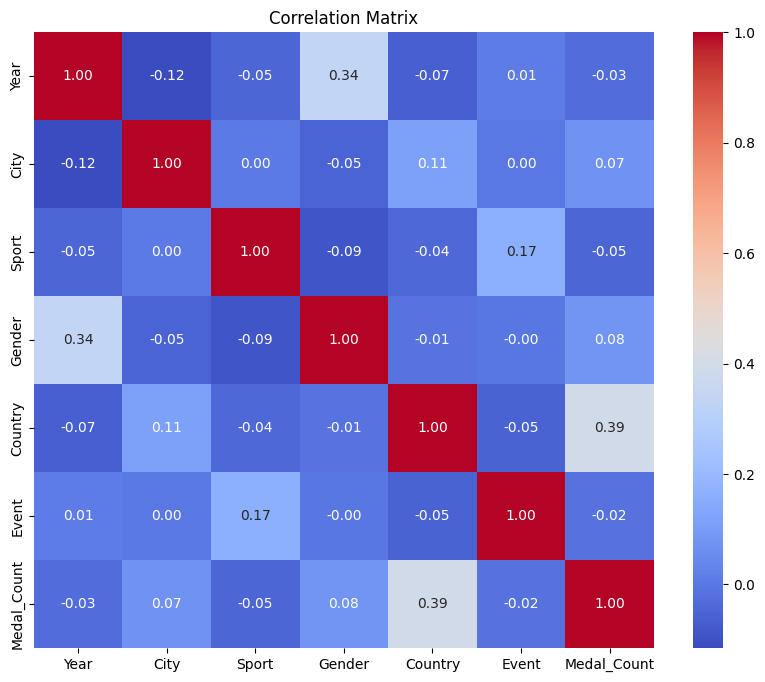

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/olympics.csv')

# Encode categorical data
label_encoders = {}
for column in ['City', 'Sport', 'Gender', 'Country', 'Event']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Feature Engineering
data['Medal_Count'] = data.groupby(['Country', 'Year'])['Medal'].transform('count')
data['Medal_Count'].fillna(0, inplace=True)

# Select features for correlation matrix
features = data[['Year', 'City', 'Sport', 'Gender', 'Country', 'Event', 'Medal_Count']]

# Compute the correlation matrix
corr_matrix = features.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Accuracy of Models:
                     Accuracy
Logistic Regression  0.351997
SVM                  0.330980
Random Forest        0.690197
Decision Tree        0.685063
KNN                  0.372052

Error Rates of Models:
                          MAE      RMSE
Logistic Regression  0.839243  1.105316
SVM                  0.754853  0.962559
Random Forest        0.416974  0.794555
Decision Tree        0.417135  0.788372
KNN                  0.843254  1.128656


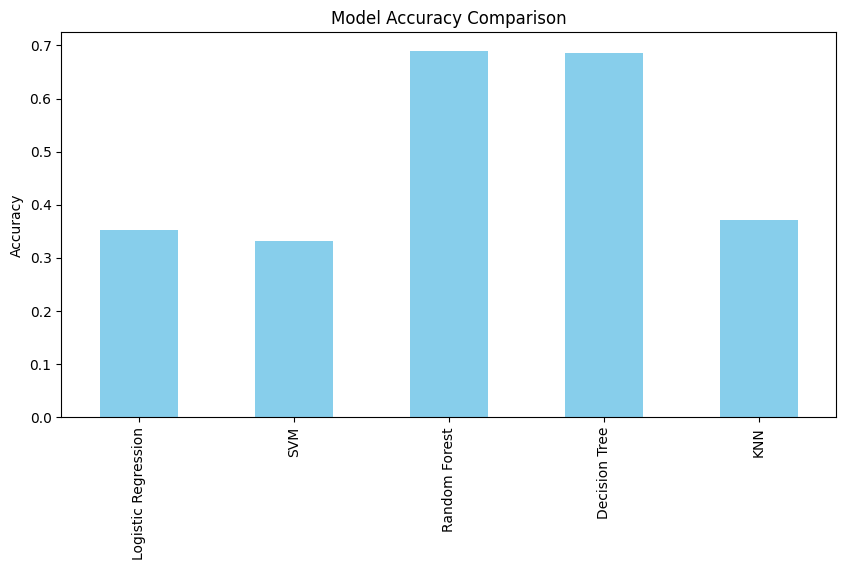

<Figure size 1000x500 with 0 Axes>

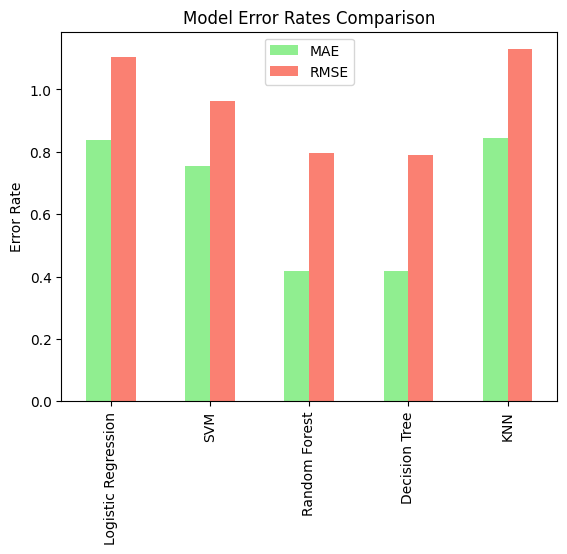

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load your dataset
df = pd.read_csv('/content/olympics.csv')

# Example preprocessing: Encoding categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Assuming 'Medal' is the target variable
X = df.drop('Medal', axis=1)
y = df['Medal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and predict with each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    results[name] = {'Accuracy': accuracy, 'MAE': mae, 'RMSE': rmse}

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
print("Accuracy of Models:")
print(results_df[['Accuracy']])
print("\nError Rates of Models:")
print(results_df[['MAE', 'RMSE']])

# Plotting accuracy
plt.figure(figsize=(10, 5))
results_df['Accuracy'].plot(kind='bar', color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Plotting error rates
plt.figure(figsize=(10, 5))
results_df[['MAE', 'RMSE']].plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Model Error Rates Comparison')
plt.ylabel('Error Rate')
plt.show()